### **Задание на семинар:**
- построить собственный граф типа «сеть»
- найти максимальный поток
- найти все минимальные разрезы
- модернизировать граф, увеличив минимальный разрез
- убедиться, что поток по графу увеличился

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

In [220]:
class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)
    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
        return True if visited[t] else False
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0
        while self.searching_algo_BFS(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]
            max_flow += path_flow
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
        return max_flow

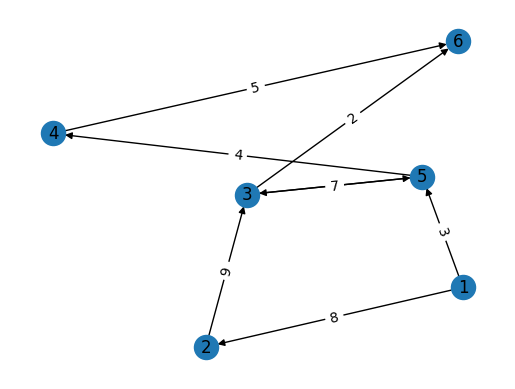

Максимальный поток: 6 


In [222]:
# Ваш представление графа
graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]

# Создание объекта графа
g = nx.DiGraph()

# Получение количества вершин графа
num_vertices = len(graph)

# Добавление вершин в граф
g.add_nodes_from(range(1, num_vertices + 1))

# Добавление ребер в граф
for i in range(num_vertices):
    for j in range(num_vertices):
        if graph[i][j] != 0:
            g.add_edge(i + 1, j + 1, capacity=graph[i][j])

# Рисование графа
pos = nx.spring_layout(g, seed=42)
labels = nx.get_edge_attributes(g, "capacity")
nx.draw_networkx(g, pos)
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.axis("off")
plt.show()

g = Graph(graph)
source = 0
sink = 5
print("Максимальный поток: %d " % g.ford_fulkerson(source, sink))

In [223]:
# Создание графа
# Ваш представление графа
graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]


G = nx.DiGraph()
G.add_nodes_from(range(6))

# Добавление ребер в граф
for i in range(6):
    for j in range(6):
        if graph[i][j] != 0:
            G.add_edge(i, j, capacity=graph[i][j])

# Нахождение минимального разреза
cut_value, partition = nx.minimum_cut(G, 0, 5, capacity="capacity")

# Получение множеств вершин разреза
reachable, non_reachable = partition

# Увеличение минимального разреза
for u, v in G.edges:
    if u in reachable and v in non_reachable:
        graph[u][v] += cut_value

# Вывод увеличенного графа
print("Увеличенный граф:")
graph

Увеличенный граф:


[[0, 8, 0, 0, 3, 0],
 [0, 0, 9, 0, 0, 0],
 [0, 0, 0, 0, 7, 8],
 [0, 0, 0, 0, 0, 5],
 [0, 0, 7, 10, 0, 0],
 [0, 0, 0, 0, 0, 0]]

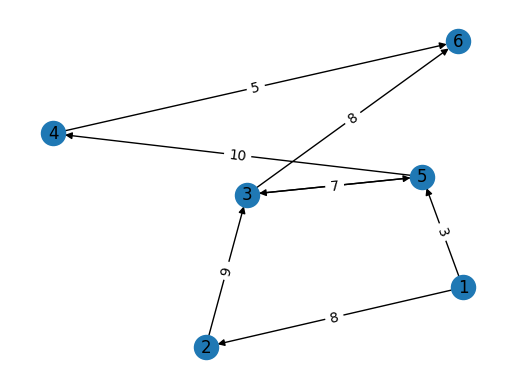

Максимальный поток: 11 


In [224]:
# Создание объекта графа
g = nx.DiGraph()

# Получение количества вершин графа
num_vertices = len(graph)

# Добавление вершин в граф
g.add_nodes_from(range(1, num_vertices + 1))

# Добавление ребер в граф
for i in range(num_vertices):
    for j in range(num_vertices):
        if graph[i][j] != 0:
            g.add_edge(i + 1, j + 1, capacity=graph[i][j])

# Рисование графа
pos = nx.spring_layout(g, seed=42)
labels = nx.get_edge_attributes(g, "capacity")
nx.draw_networkx(g, pos)
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.axis("off")
plt.show()

g = Graph(graph)
source = 0
sink = 5
print("Максимальный поток: %d " % g.ford_fulkerson(source, sink))